<a href="https://colab.research.google.com/github/AggelosRDio/MscMachineLearning/blob/master/ML8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 8

## Unzip Archive

Unzip archive.zip

In [46]:
!unzip archive.zip

Archive:  archive.zip
replace dataset/Beagle/Beagle_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: dataset/Beagle/Beagle_1.jpg  
  inflating: dataset/Beagle/Beagle_10.jpg  
  inflating: dataset/Beagle/Beagle_100.jpg  
  inflating: dataset/Beagle/Beagle_11.jpg  
  inflating: dataset/Beagle/Beagle_12.jpg  
  inflating: dataset/Beagle/Beagle_13.jpg  
  inflating: dataset/Beagle/Beagle_14.jpg  
  inflating: dataset/Beagle/Beagle_15.jpg  
  inflating: dataset/Beagle/Beagle_16.jpg  
  inflating: dataset/Beagle/Beagle_17.jpg  
  inflating: dataset/Beagle/Beagle_18.jpg  
  inflating: dataset/Beagle/Beagle_19.jpg  
  inflating: dataset/Beagle/Beagle_2.jpg  
  inflating: dataset/Beagle/Beagle_20.jpg  
  inflating: dataset/Beagle/Beagle_21.jpg  
  inflating: dataset/Beagle/Beagle_22.jpg  
  inflating: dataset/Beagle/Beagle_23.jpg  
  inflating: dataset/Beagle/Beagle_24.jpg  
  inflating: dataset/Beagle/Beagle_25.jpg  
  inflating: dataset/Beagle/Beagle_26.jpg  
  inflating: dataset/B

## Loading Images

load the images into NumPy arrays:

- Each image is loaded in RGB format
- Each image is resized to 64×64 (for speed and memory efficiency)
- The targets (labels) are converted to categorical format (one-hot encoding)

## Image Parsing and Numpy Arrays

In [47]:
import numpy as np
import os
from glob import glob
from tensorflow import keras
from tensorflow.keras.preprocessing import image

images = []
labels = []

breed_folders = [f for f in os.listdir('dataset') if os.path.isdir(os.path.join('dataset', f))]

for breed in breed_folders:
  breed_path = os.path.join('dataset', breed)
  img_files = glob(os.path.join(breed_path, '*.jpg'))

  for img_file in img_files:
    img = image.load_img(img_file, target_size=(64, 64))
    img_array = image.img_to_array(img)
    images.append(img_array)
    labels.append(breed)


images = np.array(images)
labels = np.array(labels)

## Label Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

## MLP

Create the MLP and analyze its architecture.
Train the model the following configuration:
- Optimizer: Adam
- Learning Rate: 0.001
- Loss Function: Categorical Cross-Entropy
- Batch Size: 32
- Epochs: 30

## Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

## Create MLP

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │     3,145,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,187,786 (12.16 MB)

 Trainable params: 3,187,786 (12.16 MB)

 Non-trainable params: 0 (0.00 B)

We're using 5 layers in our MLP.

- layer 1: Takes the 3D tensor (height * width * RGB channels) and flattens it to 1D vector of 12288 features
- layer 2: This layer takes the 12288 features from the previous one and outputs 256 neurons. Its purpose is to learn high-level feature combinations
- layer 3: Takes the 256 neurons from the previous layer as input and reduces them to 128. This learns intermediate-level abstract representations
- layer 4: Reduces the 128 neurons of the previous one to 64. Learns high-level compact feature representations
- layer 5: Outputs probability score for each of the classes.

## Model Training & Evaluation

In [51]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test))

mlp_test_loss, mlp_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {mlp_test_loss:.4f}")
print(f"Test Accuracy: {mlp_test_accuracy:.4f}")

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.0939 - loss: 1456.4386 - val_accuracy: 0.1031 - val_loss: 703.3708
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1185 - loss: 562.2085 - val_accuracy: 0.2010 - val_loss: 156.8501
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2595 - loss: 132.0546 - val_accuracy: 0.3196 - val_loss: 47.1431
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3595 - loss: 48.2229 - val_accuracy: 0.2526 - val_loss: 88.8956
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3624 - loss: 61.2344 - val_accuracy: 0.1907 - val_loss: 122.5326
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4606 - loss: 51.4085 - val_accuracy: 0.4124 - val_loss: 39.4048
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5049 - loss: 36.0318 - val_accuracy: 0.3814 - val_loss: 46.4396
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5836 - loss: 27.2028 - val_accu

## MLP Training History

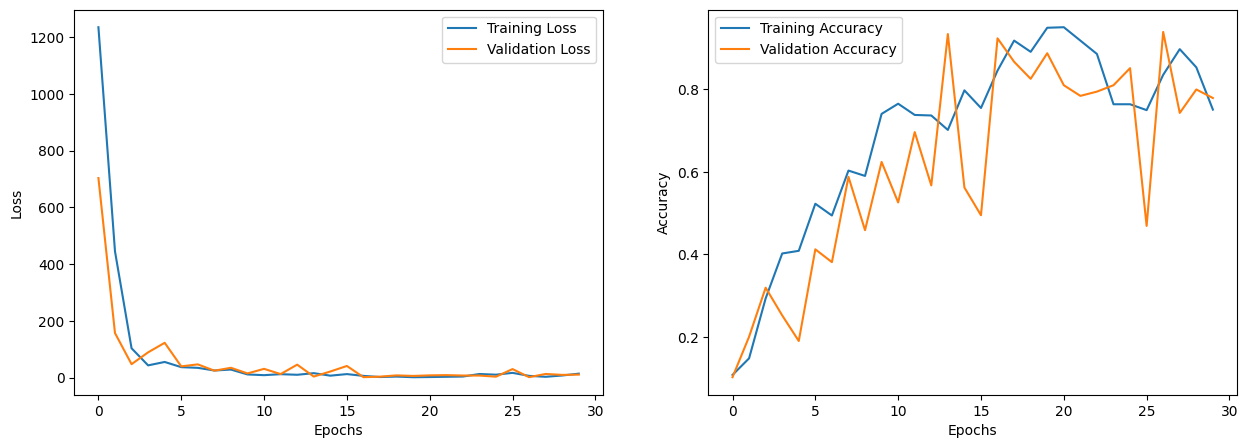

In [52]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.show()

## Create CNN Model

In [53]:
from tensorflow.keras import layers, models

model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model_cnn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy']
)

model_cnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,490 (2.61 MB)

 Trainable params: 684,490 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

We're using 9 layers in our CNN model.

- layer 1: 2D Convolution layer. Takes the original image and learns 32 different 3x3 patterns. It detects low level features like edges and corners and outputs data in the shape of (64, 64, 32)
- layer 2: This layer is used to downsample to reduce computational cost and increase receptive field of subsequent layers
- layer 3: Convolution layer that combines low level features into mid-level patterns (e.g. combine edges to detect shapes). It outputs a shape of (29, 28,64)
- layer 4: Further spatial reduction. Outputs the shape (14, 14, 64)
- layer 5: Convolution layer that learns even more complex patterns. Output shape: (12, 12, 128)
- layer 6: Final spatial reduction. Outputs (6, 6, 128)
- layer 7: Flatten layer that converts the 3D features to 1D vectors for dense layers. Outputs 4608 features
- layer 8: Dense layer that takes the 4608 neurons and combines spatial features for the final decision. Outputs 128 neurons
- layer 9: Dense output layer that produces the probability distribution over the dog breeds

## CNN Model Training & Evaluation

In [54]:
history_cnn = model_cnn.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test))

test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss_cnn:.4f}")
print(f"Test Accuracy: {test_accuracy_cnn:.4f}")

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.1184 - loss: 26.5867 - val_accuracy: 0.2474 - val_loss: 2.0978
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3562 - loss: 1.8560 - val_accuracy: 0.6340 - val_loss: 1.2429
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7500 - loss: 0.8928 - val_accuracy: 0.8711 - val_loss: 0.4976
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9369 - loss: 0.3029 - val_accuracy: 1.0000 - val_loss: 0.1305
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9951 - loss: 0.0690 - val_accuracy: 1.0000 - val_loss: 0.0513
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9963 - loss: 0.0302 - val_accuracy: 1.0000 - val_loss: 0.0265
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9985 - loss: 0.0112 - val_accuracy: 1.0000 - val_loss: 0.0067
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - 

## CNN Training History

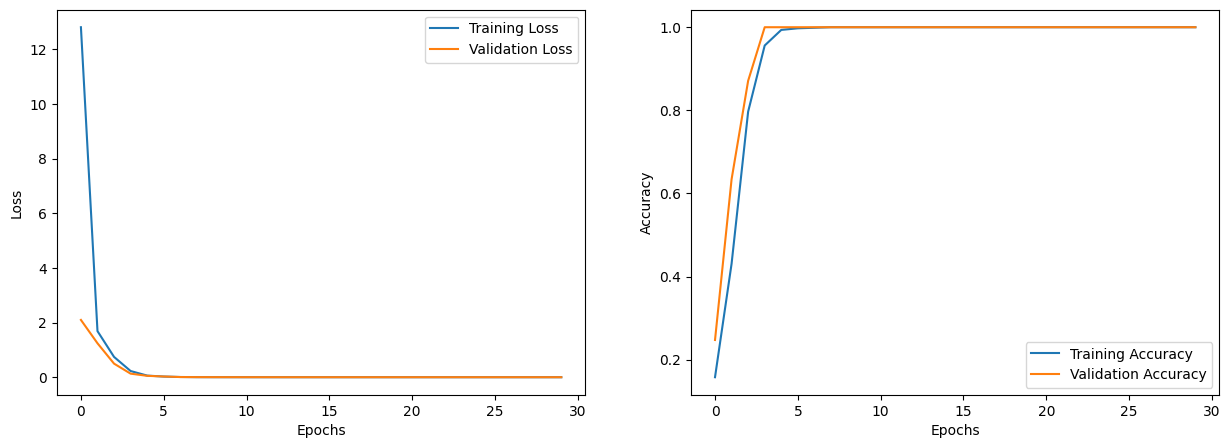

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(history_cnn.history['loss'], label='Training Loss')
axs[0].plot(history_cnn.history['val_loss'], label='Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(history_cnn.history['accuracy'], label='Training Accuracy')
axs[1].plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.show()

## CNN * MLP Comparison



In [56]:
print(f"MLP Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"CNN Accuracy: {history_cnn.history['val_accuracy'][-1]:.4f}")
print()

print(f"MLP Loss: {history.history['val_loss'][-1]:.4f}")
print(f"CNN Loss: {history_cnn.history['val_loss'][-1]:.4f}")

MLP Accuracy: 0.7784
CNN Accuracy: 1.0000

MLP Loss: 10.3651
CNN Loss: 0.0000


CNN is better than MLP because it keeps spatial relationships in convolution layers. The convolution filters also detect local patterns such as edges and corners. Last but not least the deeper layers in CNN combine low-level features into high-level representations.

## Improve CNN Accuracy

While we already have accuracy 1.0 in the CNN model, for the sake of the exercise we are going to try the following improvements:

1. Batch Normalization: Used to stabilize training and allow for higher learning rates
2. Dropout: Reduce overfitting by randomly deactivating neurons
3. Deeper Architecture: More convolution layers for better feature extraction
4. Added padding='same' to preserve spatial dimensions for better feature learning

Improve with Batch Normalization, dropout for regularization, additional convolution layers

In [57]:
model_cnn_optimized = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model_cnn_optimized.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn_optimized.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,421,930 (9.24 MB)

 Trainable params: 2,420,266 (9.23 MB)

 Non-trainable params: 1,664 (6.50 KB)

### Train Data

In [58]:
history_cnn_augmented = model_cnn_optimized.fit(
    X_train, y_train,
    batch_size=32,
    epochs=30,
    validation_data=(X_test, y_test)
)


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 374ms/step - accuracy: 0.1603 - loss: 3.2743 - val_accuracy: 0.1649 - val_loss: 5.9669
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3522 - loss: 2.1924 - val_accuracy: 0.2062 - val_loss: 2.6064
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4369 - loss: 1.8162 - val_accuracy: 0.3918 - val_loss: 1.7779
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5026 - loss: 1.5680 - val_accuracy: 0.4433 - val_loss: 1.5662
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5457 - loss: 1.3189 - val_accuracy: 0.7010 - val_loss: 1.1004
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6688 - loss: 0.9987 - val_accuracy: 0.7732 - val_loss: 0.8230
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7297 - loss: 0.8369 - val_accuracy: 0.8247 - val_loss: 0.6919
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7499 - loss: 0.7001 - val_accuracy: 0.8969 -

## New Model Evaluation

In [59]:
print(f"Test Loss: {history_cnn_augmented.history['val_loss'][-1]:.4f}")
print(f"Test Accuracy: {history_cnn_augmented.history['val_accuracy'][-1]:.4f}")

Test Loss: 0.0116
Test Accuracy: 0.9948


## Improved CNN Training History

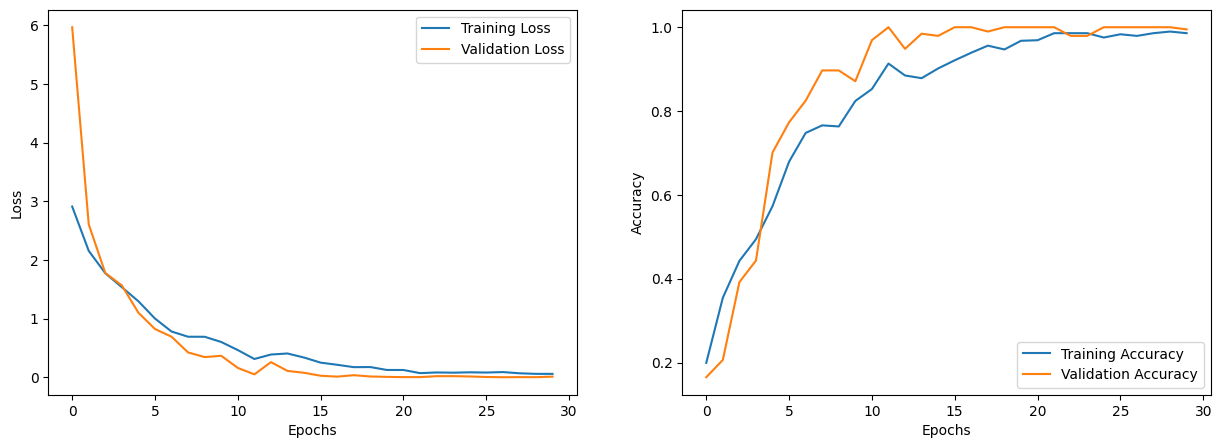

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(history_cnn_augmented.history['loss'], label='Training Loss')
axs[0].plot(history_cnn_augmented.history['val_loss'], label='Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(history_cnn_augmented.history['accuracy'], label='Training Accuracy')
axs[1].plot(history_cnn_augmented.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.show()

## Final Model Comparison

In [61]:
print(f"MLP Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"CNN Accuracy: {history_cnn.history['val_accuracy'][-1]:.4f}")
print(f"CNN Improved Accuracy: {history_cnn_augmented.history['val_accuracy'][-1]:.4f}")
print()
print(f"MLP Loss: {history.history['val_loss'][-1]:.4f}")
print(f"CNN Loss: {history_cnn.history['val_loss'][-1]:.4f}")
print(f"CNN Improved Loss: {history_cnn_augmented.history['val_loss'][-1]:.4f}")


MLP Accuracy: 0.7784
CNN Accuracy: 1.0000
CNN Improved Accuracy: 0.9948

MLP Loss: 10.3651
CNN Loss: 0.0000
CNN Improved Loss: 0.0116
